# Práctica 13 (Algoritmos Miscelaneos en gráficas)

**Alumno:** Axel Daniel Malváez Flores

**5to** Semestre

# Ejercicios

## Ejercicio 1

Encontraste una página del diccionario de una civilización perdida. Los habitantes utilizaban el alfabeto para escribir, pero no necesariamente en el mismo orden; por ejemplo, `b` podía venir antes de `a`. 

Basándote en el hecho de que las palabras del diccionario están ordenadas lexicográficamente, y asumiendo que solo utilizaban las letras provistas, determina el orden del alfabeto.

Como ejemplo, tomamos la lista ordenada `L=["zxx","xxx","xxy"]`. Vemos que la primera palabra empieza con `z`, mientras que las otras dos empiezan con `x`. Por lo tanto, la primera letra del alfabeto es `z`. Por otro lado, las últimas dos palabras empiezan con `xx`, pero la segunda tiene una `x`, y la tercera una `y`. Por lo tanto, `x` viene antes de `y` en el alfabeto.

De esta manera, concluimos que el alfabeto es `zxy`.

*Hint:* Si representas las letras como vértices de una gráfica, de modo que una arista entre `X` y `Y` indica que `X` viene antes que `Y`, lo único que tienes que hacer es encontrar un ordenamiento topológico. Piensa entonces cómo traducir las palabras que te dan a dicha gráfica.

#### Explicación

Comenzamos definiendo un diccionario el cual será la representación de nuestra gráfica. La idea es tener tuplas clave-valor donde clave será cada uno de los vértices (letras distintas) y valor será cada vértice (letra) los cuales la *clave* recibe una flecha desde estos vértices (valores).   

En nuestro algoritmo tenemos en cuenta que las palabras del diccionario están ordenadas lexicográficamente y asumimos que solo se utilizaban las letras provistas. Entonces comenzamos tomando las $i$ e $i+1$ letras de la lista e iteraremos sobre sus letras hasta que dejen de coincidir, dado que se cumpla este caso tendremos que la letra $a$ en $i$ en la que se dejó de coincidir recibirá una flecha de la letra $b$ en la que se dejó de coincidir en $i+1$. Es decir añadimos $b$ al conjunto de vértices de la letra $a$ usando nuestro diccionario.   

Posteriormente construimos una digráfica utilizando networkx con el diccionario pasado como argumento. Por lo que de aquí ya será fácil encontrar un ordenamiento topológico usando la función *topological_sort()*. Regresamos este orden regresado por la función.

Obs.
Mostramos la gráfica para visualizar el ordenamiento topológico.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
def dictionary_sort(L):
    # Representacion de nuestra gráfica en diccionario
    graf = {c:set() for w in L for c in w}

    for i in range(len(L) - 1):
        p1 = L[i]
        p2 = L[i+1]
        
        min_len = min(len(p1), len(p2))
        
        # iteramos sobre las letras de ambas palabras p1 y p2 hasta que sus letras no
        # coincidan. Esto nos dice que p1[j] es padre de p2[j]
        for j in range(min_len):
            if p1[j] != p2[j]:
                graf[p1[j]].add(p2[j]) 
                break
    
    # Creamos nuestra Digráfica
    DG = nx.DiGraph(graf)

    # Encontramos un orden topológico
    order = list(nx.topological_sort(DG))

    n = len(list(DG.nodes))

    # mostramos nuestra digráfica para que sea fácil de comprender
    pos = nx.kamada_kawai_layout(DG)
    nx.draw(DG, pos, node_color=range(n), node_size=800, cmap=plt.cm.plasma)
    # node labels
    nx.draw_networkx_labels(DG, pos, font_size=20, font_family="sans-serif")
    plt.show()
    
    return order

Prueba tu código con la siguiente celda:

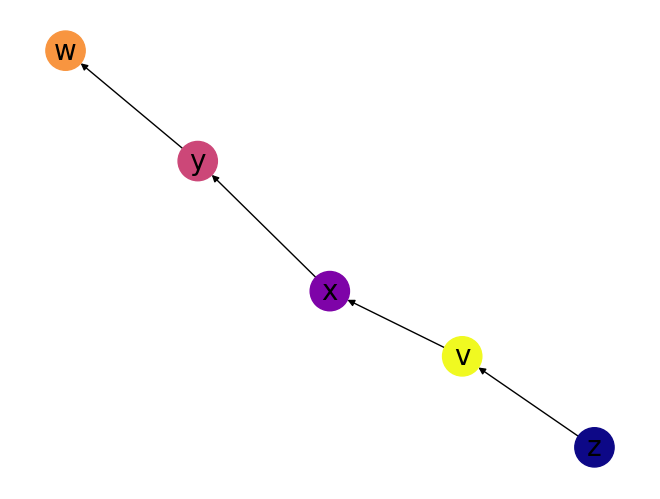

Ordenamiento esperado: [z, v, x, y, w]. Obtenido: ['z', 'v', 'x', 'y', 'w']


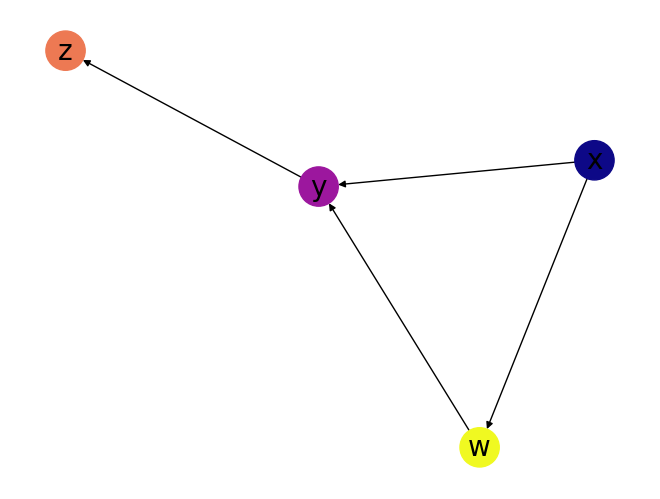

Ordenamiento esperado: [x, w, y, z]. Obtenido: ['x', 'w', 'y', 'z']


In [5]:
L = ["zxy", "zxw","vx","vyy","xwyy"]
res = dictionary_sort(L)
print(f"Ordenamiento esperado: [z, v, x, y, w]. Obtenido: {res}")

L = ["xyy","yxzw","yxzy","zyx","zyw"]
res = dictionary_sort(L)
print(f"Ordenamiento esperado: [x, w, y, z]. Obtenido: {res}")